In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from tqdm import tqdm
from tqdm.dask import TqdmCallback
from dask.diagnostics import ProgressBar
ProgressBar().register()
tqdm.pandas()

In [2]:
df = pd.read_pickle(r"/home/ee/staff/naveen.cstaff/scratch/Recoding/Recoded_pickle.pkl")
df

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,polio_0_card,dpt_1,dpt_1_card,pentavalent_1,pentavalent_1_card,hepatitis_b,hepatitis_b_card,rotavirus_1,rotavirus_1_card,dpt_1_booster
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
43177,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN
43178,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
43179,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN


In [3]:
df.columns

Index(['impr_ws', 'unimpr_ws', 'basic_drinking_w', 'limited_drinking_w',
       'jmp_w8', 'jmp_w2', 'jmp_w5', 'jmp_s1', 'jmp_s6', 'jmp_s8', 'jmp_s7',
       'highest_grade_comp', 'jmp_h1', 'jmp_h2', 'jmp_h3', 'wi_combined_poor',
       'wi_ur_poor', 'wi_statewise_poor', 'wi_statewise_ur_rs_poor',
       'electricity', 'kaccha_floor', 'kaccha_roof', 'kaccha_walls',
       'all_kaccha_house', 'own_house', 'own_agri_land', 'bpl_card',
       'insurance', 'clean_fuel_usage', 'caste_General', 'caste_OBC',
       'caste_SC', 'caste_ST', 'bank_acc', 'highest_edu_lvl_Higher',
       'highest_edu_lvl_No education', 'highest_edu_lvl_Primary',
       'highest_edu_lvl_Secondary', 'w_religion_Buddhist / Neo_Buddhist',
       'w_religion_Christian', 'w_religion_Hindu', 'w_religion_Jain',
       'w_religion_Muslim', 'w_religion_No religion',
       'w_religion_Parsi / Zoroastrian', 'w_religion_Sikh', 'child_death',
       'w_marital_status_Married', 'w_marital_status_Never in union/marriage',
       

In [4]:
df.corr()

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,polio_0_card,dpt_1,dpt_1_card,pentavalent_1,pentavalent_1_card,hepatitis_b,hepatitis_b_card,rotavirus_1,rotavirus_1_card,dpt_1_booster
impr_ws,1.000000,-1.000000,1.000000,1.000000,0.386682,0.230935,-0.472029,-0.472029,-0.042795,-0.406672,...,0.010069,0.041727,0.015799,0.029280,0.008663,0.045359,0.003785,-0.005267,-0.000037,NaN
unimpr_ws,-1.000000,1.000000,-1.000000,-1.000000,-0.386682,-0.230935,0.472029,0.472029,0.042795,0.406672,...,-0.010069,-0.041727,-0.015799,-0.029280,-0.008663,-0.045359,-0.003785,0.005267,0.000037,NaN
basic_drinking_w,1.000000,-1.000000,1.000000,1.000000,0.396304,0.232754,-0.470310,-0.470310,-0.045014,-0.405400,...,0.010504,0.042657,0.015695,0.029855,0.008459,0.045369,0.004293,-0.006416,-0.000221,NaN
limited_drinking_w,1.000000,-1.000000,1.000000,1.000000,0.385804,0.230042,-0.454021,-0.454021,-0.036853,-0.393083,...,0.007522,0.039507,0.012161,0.028535,0.004224,0.045180,0.003450,-0.003353,-0.003360,NaN
jmp_w8,0.386682,-0.386682,0.396304,0.385804,1.000000,0.281244,-0.180495,-0.180495,-0.173061,-0.155589,...,0.053592,0.023493,0.068321,0.003961,0.065175,0.003060,0.041456,-0.062434,0.038678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hepatitis_b,0.045359,-0.045359,0.045369,0.045180,0.003060,0.078451,-0.045766,-0.045766,-0.020854,-0.045290,...,0.090083,0.300518,0.053919,0.280535,0.046463,1.000000,NaN,0.164276,0.041838,NaN
hepatitis_b_card,0.003785,-0.003785,0.004293,0.003450,0.041456,0.017875,-0.006551,-0.006551,-0.033437,-0.006104,...,0.899808,0.006560,0.821531,0.029504,0.819060,NaN,1.000000,-0.018125,0.793769,NaN
rotavirus_1,-0.005267,0.005267,-0.006416,-0.003353,-0.062434,-0.021082,-0.044088,-0.044088,0.002163,-0.045353,...,-0.005430,0.215856,-0.013137,0.225572,-0.016876,0.164276,-0.018125,1.000000,NaN,NaN
rotavirus_1_card,-0.000037,0.000037,-0.000221,-0.003360,0.038678,0.007822,0.014724,0.014724,-0.015171,0.015324,...,0.820252,0.010735,0.910709,0.056782,0.917424,0.041838,0.793769,NaN,1.000000,NaN


In [5]:
df[['zero_dose','under_vacc']]

,zero_dose,under_vacc
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
43176,0.0,0.0
43177,0.0,0.0
43178,0.0,0.0
43179,0.0,0.0


In [6]:
df['zero_dose'].value_counts(dropna=False).sort_index()

0.0    40290
1.0     2761
NaN      130
Name: zero_dose, dtype: int64

In [7]:
df['under_vacc'].value_counts(dropna=False).sort_index()

0.0    35220
1.0     7865
NaN       96
Name: under_vacc, dtype: int64

In [8]:
dropped=df.dropna()
dropped.reset_index(inplace = True,drop=True)
dropped

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,polio_0_card,dpt_1,dpt_1_card,pentavalent_1,pentavalent_1_card,hepatitis_b,hepatitis_b_card,rotavirus_1,rotavirus_1_card,dpt_1_booster


In [9]:
na_free = df.dropna()
only_na = df[~df.index.isin(na_free.index)]

In [10]:
only_na['zero_dose'].value_counts(dropna=False).sort_index()

0.0    40290
1.0     2761
NaN      130
Name: zero_dose, dtype: int64

In [11]:
only_na['under_vacc'].value_counts(dropna=False).sort_index()

0.0    35220
1.0     7865
NaN       96
Name: under_vacc, dtype: int64

In [12]:
corr = df.corr()
correlation=corr.style.background_gradient(cmap='coolwarm')
# correlation.to_excel('correlation.csv', index=False)
correlation

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [13]:
corr

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,polio_0_card,dpt_1,dpt_1_card,pentavalent_1,pentavalent_1_card,hepatitis_b,hepatitis_b_card,rotavirus_1,rotavirus_1_card,dpt_1_booster
impr_ws,1.000000,-1.000000,1.000000,1.000000,0.386682,0.230935,-0.472029,-0.472029,-0.042795,-0.406672,...,0.010069,0.041727,0.015799,0.029280,0.008663,0.045359,0.003785,-0.005267,-0.000037,NaN
unimpr_ws,-1.000000,1.000000,-1.000000,-1.000000,-0.386682,-0.230935,0.472029,0.472029,0.042795,0.406672,...,-0.010069,-0.041727,-0.015799,-0.029280,-0.008663,-0.045359,-0.003785,0.005267,0.000037,NaN
basic_drinking_w,1.000000,-1.000000,1.000000,1.000000,0.396304,0.232754,-0.470310,-0.470310,-0.045014,-0.405400,...,0.010504,0.042657,0.015695,0.029855,0.008459,0.045369,0.004293,-0.006416,-0.000221,NaN
limited_drinking_w,1.000000,-1.000000,1.000000,1.000000,0.385804,0.230042,-0.454021,-0.454021,-0.036853,-0.393083,...,0.007522,0.039507,0.012161,0.028535,0.004224,0.045180,0.003450,-0.003353,-0.003360,NaN
jmp_w8,0.386682,-0.386682,0.396304,0.385804,1.000000,0.281244,-0.180495,-0.180495,-0.173061,-0.155589,...,0.053592,0.023493,0.068321,0.003961,0.065175,0.003060,0.041456,-0.062434,0.038678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hepatitis_b,0.045359,-0.045359,0.045369,0.045180,0.003060,0.078451,-0.045766,-0.045766,-0.020854,-0.045290,...,0.090083,0.300518,0.053919,0.280535,0.046463,1.000000,NaN,0.164276,0.041838,NaN
hepatitis_b_card,0.003785,-0.003785,0.004293,0.003450,0.041456,0.017875,-0.006551,-0.006551,-0.033437,-0.006104,...,0.899808,0.006560,0.821531,0.029504,0.819060,NaN,1.000000,-0.018125,0.793769,NaN
rotavirus_1,-0.005267,0.005267,-0.006416,-0.003353,-0.062434,-0.021082,-0.044088,-0.044088,0.002163,-0.045353,...,-0.005430,0.215856,-0.013137,0.225572,-0.016876,0.164276,-0.018125,1.000000,NaN,NaN
rotavirus_1_card,-0.000037,0.000037,-0.000221,-0.003360,0.038678,0.007822,0.014724,0.014724,-0.015171,0.015324,...,0.820252,0.010735,0.910709,0.056782,0.917424,0.041838,0.793769,NaN,1.000000,NaN


In [14]:
df=df[["impr_ws","unimpr_ws","basic_drinking_w","limited_drinking_w","jmp_w8","jmp_w2","jmp_w5","jmp_s1",
       "jmp_s6","jmp_s8","jmp_s7","jmp_h1","jmp_h2","jmp_h3",
       "wi_combined_poor", 'wi_ur_poor', 'wi_statewise_poor', 'wi_statewise_ur_rs_poor',
       "electricity","kaccha_floor","kaccha_roof","kaccha_walls","all_kaccha_house","own_house","own_agri_land",
       "bpl_card","insurance",
#        "clean_fuel_usage",
       'caste_General', 'caste_OBC','caste_SC', 'caste_ST',
       "bank_acc",
       'highest_edu_lvl_Higher',
       'highest_edu_lvl_No education', 'highest_edu_lvl_Primary',
       'highest_edu_lvl_Secondary', 'w_religion_Buddhist / Neo_Buddhist',
       'w_religion_Christian', 'w_religion_Hindu', 'w_religion_Jain',
       'w_religion_Muslim', 'w_religion_No religion',
       'w_religion_Parsi / Zoroastrian', 'w_religion_Sikh',
#        "child_death",
       'w_marital_status_Married', 'w_marital_status_Never in union/marriage',
       'w_marital_status_widowed divorced separated deserted',
        "mcp_card","antenatal_care","antenatal_4plus","tetanus",
#        "birth_personnel",
       'delivery_place_Home','delivery_place_Private', 'delivery_place_Public',
       "delivery_financial_assistance","delivery_jsy","baby_checkup_2mnts","modern_contraceptive",
       "icds_rec","icds_rec_bf",
       
#        "w_age_marr",
       "any_anaemia","stunting","stunting_severe","wasting","wasting_severe","underweight","underweight_severe",
       "zero_dose",'fully_vac','under_vacc',
#        'Elevation',
#        'LATNUM',
#        'LONGNUM'
      ]]

# df=df[["impr_ws","unimpr_ws","basic_drinking_w","limited_drinking_w","jmp_w8","jmp_w2","jmp_w5","jmp_s1","jmp_s6","jmp_s8","jmp_s7","jmp_h1","jmp_h2","jmp_h3","wi_combined","wi_combined_score","wi_ur","wi_ur_score","kaccha_floor","kaccha_roof","kaccha_walls","all_kaccha_house","own_house","own_agri_land","bpl_card","clean_fuel_usage","caste","highest_grade_comp","bank_acc","highest_edu_lvl","highest_edu_year","w_religion","child_death","w_marital_status","other_wives","mcp_card","antenatal_care","antenatal_4plus","tetanus","birth_personnel","delivery_place","icds_rec","icds_rec_bf","w_age_marr","zero_dose"]]
# ,"bcg","bcg_card","polio_0","polio_0_card","polio_doses","dpt_1","dpt_1_card","dpt_doses","pentavalent_1","pentavalent_1_card","pentavalent_doses","hepatitis_b","hepatitis_b_card","hepatitis_b_doses","rotavirus_1","rotavirus_1_card","rotavirus_doses","je_doses","measles_doses","dpt_1_booster"
# df=df[["impr_ws","unimpr_ws","basic_drinking_w","zero_dose"]]
# df=df[["bank_acc","zero_dose"]]

df.to_csv('check.csv', index=False)
df

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,zero_dose,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
43177,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43178,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43179,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
df['zero_dose'].value_counts().sort_index()

0.0    40290
1.0     2761
Name: zero_dose, dtype: int64

In [16]:
# df[df['zero_dose']==0].drop_duplicates(subset=["impr_ws","unimpr_ws","basic_drinking_w","limited_drinking_w","jmp_w8","jmp_w2","jmp_w5","jmp_s1","jmp_s6","jmp_s8","jmp_s7","jmp_h1","jmp_h2","jmp_h3","kaccha_floor","kaccha_roof","kaccha_walls","all_kaccha_house","own_house","own_agri_land","bpl_card","clean_fuel_usage","zero_dose"])

In [17]:
df

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,zero_dose,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
43177,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43178,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43179,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df.corr()['zero_dose']

impr_ws              -0.042420
unimpr_ws             0.042420
basic_drinking_w     -0.043395
limited_drinking_w   -0.040382
jmp_w8               -0.023440
                        ...   
underweight           0.002811
underweight_severe    0.007859
zero_dose             1.000000
fully_vac            -0.558146
under_vacc            0.555163
Name: zero_dose, Length: 70, dtype: float64

In [19]:
df.corr()['zero_dose'].to_frame().style.background_gradient(cmap='coolwarm')

,zero_dose
impr_ws,-0.042420
unimpr_ws,0.042420
basic_drinking_w,-0.043395
limited_drinking_w,-0.040382
jmp_w8,-0.023440
jmp_w2,-0.024067
jmp_w5,0.025901
jmp_s1,0.025901
jmp_s6,0.026042
jmp_s8,0.025840


In [20]:
df.isnull().sum()

impr_ws               2244
unimpr_ws             2244
basic_drinking_w      2745
limited_drinking_w    2267
jmp_w8                  34
                      ... 
underweight           1578
underweight_severe    1578
zero_dose              130
fully_vac              166
under_vacc              96
Length: 70, dtype: int64

In [21]:
df['zero_dose'].value_counts().sort_index()

0.0    40290
1.0     2761
Name: zero_dose, dtype: int64

In [22]:
df.isna().sum()

impr_ws               2244
unimpr_ws             2244
basic_drinking_w      2745
limited_drinking_w    2267
jmp_w8                  34
                      ... 
underweight           1578
underweight_severe    1578
zero_dose              130
fully_vac              166
under_vacc              96
Length: 70, dtype: int64

In [23]:
df.isnull().sum().to_frame().sort_values(by=[0])

,0
highest_edu_lvl_Primary,0
all_kaccha_house,0
own_house,0
own_agri_land,0
insurance,0
...,...
basic_drinking_w,2745
tetanus,2750
mcp_card,4165
delivery_jsy,6570


In [24]:
df=df.dropna()
df.reset_index(inplace = True,drop=True)
df

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,zero_dose,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
30182,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30183,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30184,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# df=pd.get_dummies(data=df, columns=['caste','highest_edu_lvl','w_religion','w_marital_status','delivery_place'])
# # df.drop(['caste','highest_edu_lvl','w_religion','w_marital_status','delivery_place'], axis='columns',inplace=True)
# df

In [26]:
# def wi_combined_poor(row):
#     if row['wi_combined']==1 or row['wi_combined']==2:
#         val = 1
#     elif row['wi_combined'] in (3,4,5):
#         val = 0
#     else:
#         val = None
#     return val

In [27]:
# df['wi_combined_poor'] = df.progress_apply(wi_combined_poor, axis=1)

In [28]:
# df['wi_combined_poor'].value_counts(dropna=False)

In [29]:
# def wi_ur_poor(row):
#     if row['wi_ur']==1 or row['wi_ur']==2:
#         val = 1
#     elif row['wi_ur'] in (3,4,5):
#         val = 0
#     else:
#         val = None
#     return val

In [30]:
# df['wi_ur_poor'] = df.progress_apply(wi_ur_poor, axis=1)

In [31]:
# df['wi_ur_poor'].value_counts(dropna=False)

In [32]:
# df['wi_combined_score'].hist(bins=50)

In [33]:
# df.drop(['wi_combined','wi_ur'], axis='columns',inplace=True)

In [34]:
df.to_csv('check.csv', index=False)

# Correlation

In [35]:
df

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,zero_dose,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
30182,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30183,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30184,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
corr = df.corr()
correlation=corr.style.background_gradient(cmap='coolwarm')
# correlation.to_excel('correlation.csv', index=False)
correlation

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,jmp_s7,jmp_h1,jmp_h2,jmp_h3,wi_combined_poor,wi_ur_poor,wi_statewise_poor,wi_statewise_ur_rs_poor,electricity,kaccha_floor,kaccha_roof,kaccha_walls,all_kaccha_house,own_house,own_agri_land,bpl_card,insurance,caste_General,caste_OBC,caste_SC,caste_ST,bank_acc,highest_edu_lvl_Higher,highest_edu_lvl_No education,highest_edu_lvl_Primary,highest_edu_lvl_Secondary,w_religion_Buddhist / Neo_Buddhist,w_religion_Christian,w_religion_Hindu,w_religion_Jain,w_religion_Muslim,w_religion_No religion,w_religion_Parsi / Zoroastrian,w_religion_Sikh,w_marital_status_Married,w_marital_status_Never in union/marriage,w_marital_status_widowed divorced separated deserted,mcp_card,antenatal_care,antenatal_4plus,tetanus,delivery_place_Home,delivery_place_Private,delivery_place_Public,delivery_financial_assistance,delivery_jsy,baby_checkup_2mnts,modern_contraceptive,icds_rec,icds_rec_bf,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,zero_dose,fully_vac,under_vacc
impr_ws,1.000000,-1.000000,1.000000,1.000000,0.369463,0.221434,-0.452080,-0.452080,-0.055958,-0.386629,-0.133253,0.002389,0.083368,-0.019177,-0.138125,-0.107766,-0.107704,-0.086201,0.029349,-0.090665,-0.019631,-0.096249,-0.094241,-0.010061,-0.041242,-0.040973,-0.025230,0.040667,0.052372,0.037883,-0.140842,0.003993,0.051105,-0.011717,-0.013808,-0.020521,-0.005304,-0.092160,0.030671,-0.002545,0.029152,0.005183,0.001385,0.026960,0.010385,-0.001802,-0.010446,0.010163,0.007490,0.007564,0.001740,nan,0.058640,-0.058893,-0.028869,-0.028569,0.016829,0.011203,-0.005620,-0.004894,-0.009246,-0.012280,-0.012904,-0.006999,-0.010065,-0.013348,-0.008863,-0.018270,0.014528,-0.014528
unimpr_ws,-1.000000,1.000000,-1.000000,-1.000000,-0.369463,-0.221434,0.452080,0.452080,0.055958,0.386629,0.133253,-0.002389,-0.083368,0.019177,0.138125,0.107766,0.107704,0.086201,-0.029349,0.090665,0.019631,0.096249,0.094241,0.010061,0.041242,0.040973,0.025230,-0.040667,-0.052372,-0.037883,0.140842,-0.003993,-0.051105,0.011717,0.013808,0.020521,0.005304,0.092160,-0.030671,0.002545,-0.029152,-0.005183,-0.001385,-0.026960,-0.010385,0.001802,0.010446,-0.010163,-0.007490,-0.007564,-0.001740,nan,-0.058640,0.058893,0.028869,0.028569,-0.016829,-0.011203,0.005620,0.004894,0.009246,0.012280,0.012904,0.006999,0.010065,0.013348,0.008863,0.018270,-0.014528,0.014528
basic_drinking_w,1.000000,-1.000000,1.000000,1.000000,0.369463,0.221434,-0.452080,-0.452080,-0.055958,-0.386629,-0.133253,0.002389,0.083368,-0.019177,-0.138125,-0.107766,-0.107704,-0.086201,0.029349,-0.090665,-0.019631,-0.096249,-0.094241,-0.010061,-0.041242,-0.040973,-0.025230,0.040667,0.052372,0.037883,-0.140842,0.003993,0.051105,-0.011717,-0.013808,-0.020521,-0.005304,-0.092160,0.030671,-0.002545,0.029152,0.005183,0.001385,0.026960,0.010385,-0.001802,-0.010446,0.010163,0.007490,0.007564,0.001740,nan,0.058640,-0.058893,-0.028869,-0.028569,0.016829,0.011203,-0.005620,-0.004894,-0.009246,-0.012280,-0.012904,-0.006999,-0.010065,-0.013348,-0.008863,-0.018270,0.014528,-0.014528
limited_drinking_w,1.000000,-1.000000,1.000000,1.000000,0.369463,0.221434,-0.452080,-0.452080,-0.055958,-0.386629,-0.133253,0.002389,0.083368,-0.019177,-0.138125,-0.107766,-0.107704,-0.086201,0.029349,-0.090665,-0.019631,-0.096249,-0.094241,-0.010061,-0.041242,-0.040973,-0.025230,0.040667,0.052372,0.037883,-0.140842,0.003993,0.051105,-0.011717,-0.013808,-0.020521,-0.005304,-0.092160,0.030671,-0.002545,0.029152,0.005183,0.001385,0.026960,0.010385,-0.001802,-0.010446,0.010163,0.007490,0.007564,0.001740,nan,0.058640,-0.058893,-0.028869,-0.028569,0.016829,0.011203,-0.005620,-0.004894,-0.009246,-0.012280,-0.012904,-0.006999,-0.010065,-0.013348,-0.008863,-0.018270,0.014528,-0.014528
jmp_w8,0.369463,-0.369463,0.369463,0.369463,1.000000,0.282691,-0.167027,-0.167027,-0.182814,-0.142845,-0.049232,0.018530,0.190928,-0.038070,-0.245000,-0.202605,-0.211924,-0.169842,0.046478,-0.159480,-

In [37]:
import pandas as pd
import numpy as np
from scipy import stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [38]:
data_encoded=df

In [39]:
# rows= []

# for var1 in data_encoded:
#   col = []
#   for var2 in data_encoded :
#     cramers =cramers_v(data_encoded[var1], data_encoded[var2]) # Cramer's V test
#     col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
#   rows.append(col)
  
# cramers_results = np.array(rows)
# cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

# cramer

In [40]:
data_encoded

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,zero_dose,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
30182,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30183,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30184,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [42]:
# %%time
# rows= []
# np.seterr(divide='ignore', invalid='ignore')

# for var1 in data_encoded:
#   col = []
#   for var2 in data_encoded :
#     cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
#     col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
#   rows.append(col)
  
# cramers_results = np.array(rows)
# cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

# cramer

In [43]:
df['zero_dose'].value_counts().sort_index()

0.0    28833
1.0     1353
Name: zero_dose, dtype: int64

In [44]:
X= df.drop('zero_dose', axis=1)
X

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,icds_rec_bf,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
30182,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
30183,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30184,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
y=df[['zero_dose']]
y

,zero_dose
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30181,0.0
30182,0.0
30183,0.0
30184,0.0


In [46]:
y.value_counts(dropna=False)

zero_dose
0.0          28833
1.0           1353
dtype: int64

<AxesSubplot:ylabel='None'>

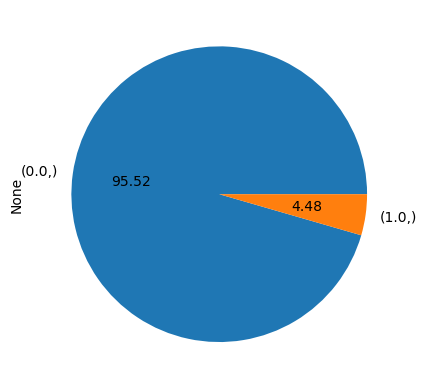

In [47]:
y.value_counts(dropna=False).plot.pie(autopct='%.2f')

# Weight balancing

# No Sampling

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [49]:
len(y_train),len(y_test)

(21130, 9056)

In [50]:
y_train.value_counts(dropna=False)

zero_dose
0.0          20184
1.0            946
dtype: int64

In [51]:
len(X_train),len(y_train)

(21130, 21130)

In [52]:
y_train['zero_dose'].value_counts()

0.0    20184
1.0      946
Name: zero_dose, dtype: int64

In [53]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')

In [55]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [56]:
c=lr.intercept_
c

array([-0.6931192])

In [57]:
m=lr.coef_
m

array([[-1.34777008e-01, -2.27862810e-01, -1.34777008e-01,
        -1.34777008e-01,  3.18640894e-02, -1.70530053e-01,
        -1.25592300e-02, -1.25592300e-02,  9.27713026e-02,
         1.29889211e-01, -6.28200551e-01,  1.01616679e-01,
         2.55291881e-01, -2.91439918e-01,  4.90251408e-02,
         1.28278970e-01, -4.06380479e-02,  7.31253849e-02,
        -5.33483821e-02,  7.22867410e-01, -6.94049897e-03,
        -6.38285007e-02, -7.64980283e-01, -1.24838647e-01,
         5.91321897e-02, -9.83538029e-02, -9.11028589e-02,
        -2.57171149e-01, -2.41139338e-02, -2.36467655e-01,
         2.87146781e-03,  1.88979658e-01, -2.75392082e-01,
         3.22560001e-02,  1.31027370e-01, -2.50531106e-01,
         5.24121564e-01,  1.00274583e+00,  7.73474881e-01,
        -7.28970736e-01,  8.40657516e-01, -2.82728465e-01,
        -2.60102299e-01,  6.52683907e-01, -1.02319613e+00,
         6.71298342e-01, -1.07420341e-02, -8.58419438e-02,
        -1.13445113e-01, -2.02250544e-01, -8.61779929e-0

In [58]:
y_pred_train = lr.predict(X_train)

In [59]:
pd.value_counts(y_pred_train)

0.0    17950
1.0     3180
dtype: int64

In [60]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [61]:
y_pred_test = lr.predict(X_test)

In [62]:
pd.value_counts(y_pred_test)

0.0    7767
1.0    1289
dtype: int64

In [63]:
cm=confusion_matrix(y_test,y_pred_test)

In [64]:
len(X_train),len(y_train)

(21130, 21130)

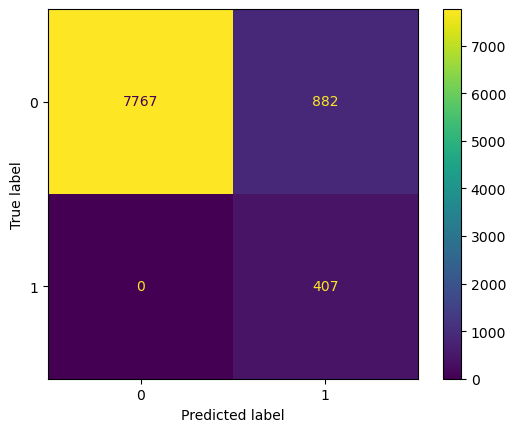

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [66]:
ns=classification_report(y_test,y_pred_test)
print(ns)

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      8649
         1.0       0.32      1.00      0.48       407

    accuracy                           0.90      9056
   macro avg       0.66      0.95      0.71      9056
weighted avg       0.97      0.90      0.93      9056



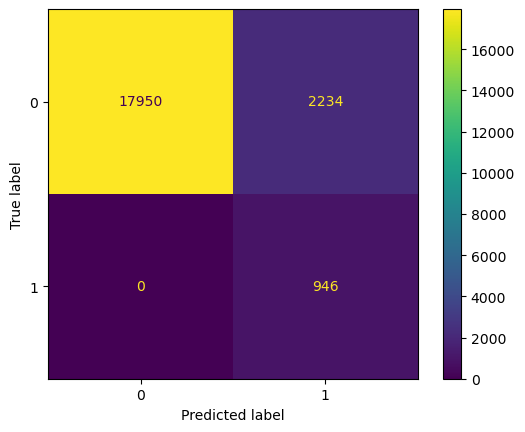

In [67]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [68]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     20184
         1.0       0.30      1.00      0.46       946

    accuracy                           0.89     21130
   macro avg       0.65      0.94      0.70     21130
weighted avg       0.97      0.89      0.92     21130



In [69]:
print(lr.coef_)
print(lr.intercept_)

[[-1.34777008e-01 -2.27862810e-01 -1.34777008e-01 -1.34777008e-01
   3.18640894e-02 -1.70530053e-01 -1.25592300e-02 -1.25592300e-02
   9.27713026e-02  1.29889211e-01 -6.28200551e-01  1.01616679e-01
   2.55291881e-01 -2.91439918e-01  4.90251408e-02  1.28278970e-01
  -4.06380479e-02  7.31253849e-02 -5.33483821e-02  7.22867410e-01
  -6.94049897e-03 -6.38285007e-02 -7.64980283e-01 -1.24838647e-01
   5.91321897e-02 -9.83538029e-02 -9.11028589e-02 -2.57171149e-01
  -2.41139338e-02 -2.36467655e-01  2.87146781e-03  1.88979658e-01
  -2.75392082e-01  3.22560001e-02  1.31027370e-01 -2.50531106e-01
   5.24121564e-01  1.00274583e+00  7.73474881e-01 -7.28970736e-01
   8.40657516e-01 -2.82728465e-01 -2.60102299e-01  6.52683907e-01
  -1.02319613e+00  6.71298342e-01 -1.07420341e-02 -8.58419438e-02
  -1.13445113e-01 -2.02250544e-01 -8.61779929e-02  0.00000000e+00
  -3.50142610e-01 -4.81307822e-01 -2.11770699e-01  2.88128781e-01
  -1.92932129e-01 -4.94846321e-02 -4.83543540e-02 -1.82969517e-01
  -3.55822

# Undersampling

In [70]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# # rus = RandomUnderSampler(sampling_strategy="not minority") # String
# X_res, y_res = rus.fit_resample(X, y)
# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [71]:
y.value_counts()

zero_dose
0.0          28833
1.0           1353
dtype: int64

In [72]:
# y_res.value_counts()

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [74]:
len(y_train),len(y_test)

(21130, 9056)

In [75]:
y_train.value_counts(dropna=False)

zero_dose
0.0          20184
1.0            946
dtype: int64

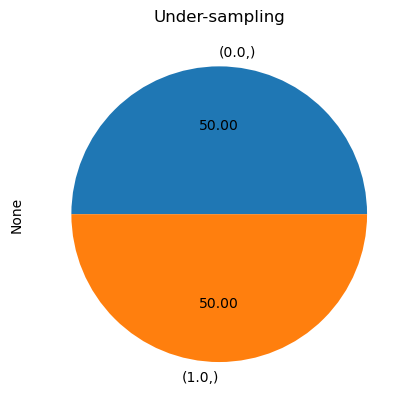

In [76]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1,random_state=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [77]:
X_train,y_train=X_res,y_res

In [78]:
len(X_train),len(y_train)

(1892, 1892)

In [79]:
y_train['zero_dose'].value_counts()

0.0    946
1.0    946
Name: zero_dose, dtype: int64

In [80]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')

In [82]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [83]:
c=lr.intercept_
c

array([-1.35826617])

In [84]:
m=lr.coef_
m

array([[-1.58750797e-01,  1.57172950e-01, -1.58750797e-01,
        -1.58750797e-01,  3.53043544e-01, -3.19543507e-01,
         4.62972978e-01,  4.62972978e-01,  4.21409907e-01,
         3.37706828e-01,  3.87348430e-02, -1.11470224e-02,
         4.52392688e-01, -1.26515707e-01,  1.35678977e-01,
        -1.89860503e-01, -2.51423678e-02, -1.18087499e-02,
         3.74597981e-02,  1.08240396e+00,  5.36779408e-01,
        -4.29140100e-01, -1.16722119e+00, -3.35587012e-01,
        -4.99828774e-02, -4.09121207e-01, -2.17533939e-01,
         1.12230956e-01,  7.34674494e-01,  1.46338374e-01,
         9.72087215e-01,  1.08107536e-01, -2.00732333e-01,
         1.10037744e-01,  4.70628279e-01, -3.81511537e-01,
        -2.02031103e-01,  1.28863475e-01,  2.85388570e-01,
        -2.09541585e-03,  3.08102890e-01,  0.00000000e+00,
         0.00000000e+00, -2.17439161e-01, -3.71805804e-01,
         5.06348186e-01, -1.36120229e-01,  3.90371968e-01,
        -1.10298286e-01, -1.63471566e-01,  1.32281600e-0

In [85]:
y_pred_train = lr.predict(X_train)

In [86]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [87]:
y_pred_test = lr.predict(X_test)

In [88]:
pd.value_counts(y_pred_test)

0.0    7775
1.0    1281
dtype: int64

In [89]:
cm=confusion_matrix(y_test,y_pred_test)

In [90]:
len(X_train),len(y_train)

(1892, 1892)

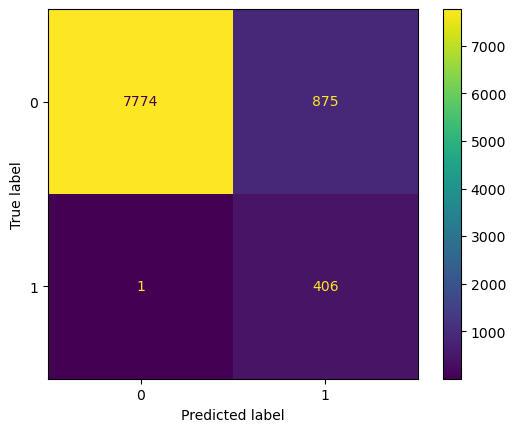

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [92]:
us=classification_report(y_test,y_pred_test)
print(us)

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      8649
         1.0       0.32      1.00      0.48       407

    accuracy                           0.90      9056
   macro avg       0.66      0.95      0.71      9056
weighted avg       0.97      0.90      0.93      9056



In [93]:
us

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.90      0.95      8649\n         1.0       0.32      1.00      0.48       407\n\n    accuracy                           0.90      9056\n   macro avg       0.66      0.95      0.71      9056\nweighted avg       0.97      0.90      0.93      9056\n'

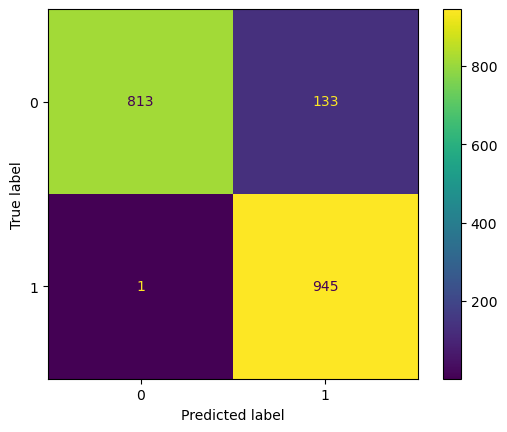

In [94]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [95]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92       946
         1.0       0.88      1.00      0.93       946

    accuracy                           0.93      1892
   macro avg       0.94      0.93      0.93      1892
weighted avg       0.94      0.93      0.93      1892



In [96]:
print(lr.coef_)
print(lr.intercept_)

[[-1.58750797e-01  1.57172950e-01 -1.58750797e-01 -1.58750797e-01
   3.53043544e-01 -3.19543507e-01  4.62972978e-01  4.62972978e-01
   4.21409907e-01  3.37706828e-01  3.87348430e-02 -1.11470224e-02
   4.52392688e-01 -1.26515707e-01  1.35678977e-01 -1.89860503e-01
  -2.51423678e-02 -1.18087499e-02  3.74597981e-02  1.08240396e+00
   5.36779408e-01 -4.29140100e-01 -1.16722119e+00 -3.35587012e-01
  -4.99828774e-02 -4.09121207e-01 -2.17533939e-01  1.12230956e-01
   7.34674494e-01  1.46338374e-01  9.72087215e-01  1.08107536e-01
  -2.00732333e-01  1.10037744e-01  4.70628279e-01 -3.81511537e-01
  -2.02031103e-01  1.28863475e-01  2.85388570e-01 -2.09541585e-03
   3.08102890e-01  0.00000000e+00  0.00000000e+00 -2.17439161e-01
  -3.71805804e-01  5.06348186e-01 -1.36120229e-01  3.90371968e-01
  -1.10298286e-01 -1.63471566e-01  1.32281600e-01  0.00000000e+00
  -1.18476636e-01 -6.31709823e-02 -3.64158710e-01  2.68847817e-01
  -1.03173723e-01 -1.18802879e-01 -3.88491106e-01  1.75935518e-01
  -8.59199

# Oversampling

In [97]:
y.value_counts()

zero_dose
0.0          28833
1.0           1353
dtype: int64

In [98]:
y_res.value_counts()

zero_dose
0.0          946
1.0          946
dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [100]:
len(y_train),len(y_test)

(21130, 9056)

In [101]:
y_train.value_counts()

zero_dose
0.0          20184
1.0            946
dtype: int64

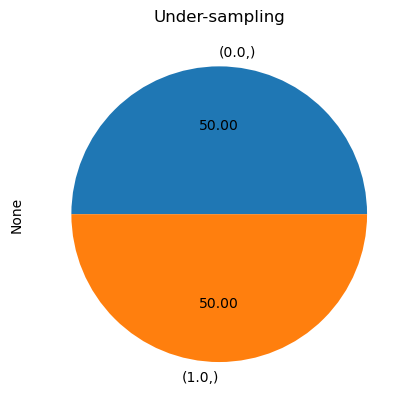

In [102]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy=1,random_state=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [103]:
X_train,y_train=X_res,y_res

In [104]:
y_train['zero_dose'].value_counts()

0.0    20184
1.0    20184
Name: zero_dose, dtype: int64

In [105]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')

In [107]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [108]:
c=lr.intercept_
c

array([-0.88824309])

In [109]:
m=lr.coef_
m

array([[-1.63569992e-01, -3.72823069e-01, -1.63569992e-01,
        -1.63569992e-01,  6.67103868e-02, -1.67878839e-01,
         2.09993405e-02,  2.09993405e-02,  9.50461389e-02,
         1.11936736e-02, -5.85598708e-01,  1.85067031e-01,
         2.32796395e-01, -3.06161991e-01,  6.82027503e-02,
         1.26269811e-01, -8.20346848e-02,  7.04168527e-02,
        -6.94188203e-02,  7.69522728e-01, -1.24817266e-02,
        -4.95190509e-02, -7.71159270e-01, -1.37417408e-01,
         7.15716757e-02, -8.55081899e-02, -5.94557542e-02,
        -2.22296603e-01, -1.38772509e-03, -2.19813571e-01,
         7.14192146e-02,  1.60061940e-01, -2.98329166e-01,
        -3.27245540e-02,  8.15901474e-02, -2.86929489e-01,
         7.50645562e-01,  1.13418726e+00,  9.19537670e-01,
        -1.06700304e+00,  1.02211306e+00, -4.48270018e-01,
        -3.88781263e-01,  8.49358760e-01, -1.14673739e+00,
         6.98034839e-01, -8.76905060e-02, -5.33341709e-02,
        -1.80027874e-01, -1.88982360e-01, -3.76920405e-0

In [110]:
y_pred_train = lr.predict(X_train)

In [111]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [112]:
y_pred_test = lr.predict(X_test)

In [113]:
pd.value_counts(y_pred_test)

0.0    7768
1.0    1288
dtype: int64

In [114]:
cm=confusion_matrix(y_test,y_pred_test)

In [115]:
len(X_train),len(y_train)

(40368, 40368)

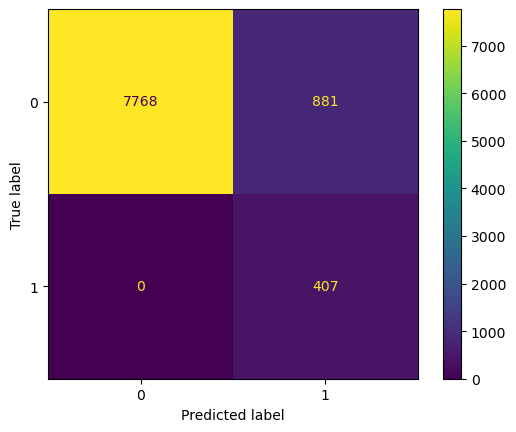

In [116]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [117]:
os=classification_report(y_test,y_pred_test)
print(os)

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      8649
         1.0       0.32      1.00      0.48       407

    accuracy                           0.90      9056
   macro avg       0.66      0.95      0.71      9056
weighted avg       0.97      0.90      0.93      9056



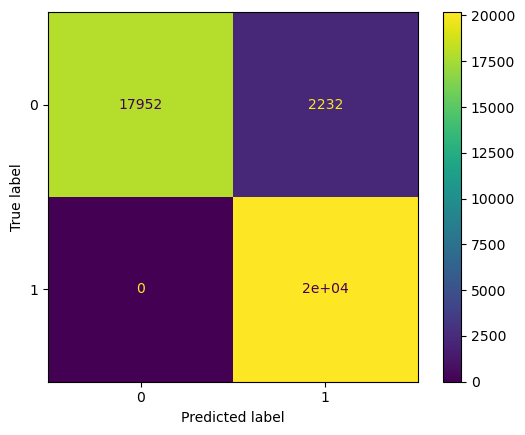

In [118]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [119]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     20184
         1.0       0.90      1.00      0.95     20184

    accuracy                           0.94     40368
   macro avg       0.95      0.94      0.94     40368
weighted avg       0.95      0.94      0.94     40368



In [120]:
print(lr.coef_)
print(lr.intercept_)

[[-1.63569992e-01 -3.72823069e-01 -1.63569992e-01 -1.63569992e-01
   6.67103868e-02 -1.67878839e-01  2.09993405e-02  2.09993405e-02
   9.50461389e-02  1.11936736e-02 -5.85598708e-01  1.85067031e-01
   2.32796395e-01 -3.06161991e-01  6.82027503e-02  1.26269811e-01
  -8.20346848e-02  7.04168527e-02 -6.94188203e-02  7.69522728e-01
  -1.24817266e-02 -4.95190509e-02 -7.71159270e-01 -1.37417408e-01
   7.15716757e-02 -8.55081899e-02 -5.94557542e-02 -2.22296603e-01
  -1.38772509e-03 -2.19813571e-01  7.14192146e-02  1.60061940e-01
  -2.98329166e-01 -3.27245540e-02  8.15901474e-02 -2.86929489e-01
   7.50645562e-01  1.13418726e+00  9.19537670e-01 -1.06700304e+00
   1.02211306e+00 -4.48270018e-01 -3.88781263e-01  8.49358760e-01
  -1.14673739e+00  6.98034839e-01 -8.76905060e-02 -5.33341709e-02
  -1.80027874e-01 -1.88982360e-01 -3.76920405e-02  0.00000000e+00
  -3.63989908e-01 -4.75719433e-01 -1.97361645e-01  2.67414137e-01
  -2.01510042e-01 -2.41369080e-02 -5.76232824e-02 -1.79569217e-01
  -4.97257

# Oversampling SMOTE

In [121]:
y.value_counts()

zero_dose
0.0          28833
1.0           1353
dtype: int64

In [122]:
X

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,icds_rec_bf,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
30182,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
30183,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30184,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
y

,zero_dose
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30181,0.0
30182,0.0
30183,0.0
30184,0.0


In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [125]:
len(X_train),len(X_test),len(y_train),len(y_test)

(21130, 9056, 21130, 9056)

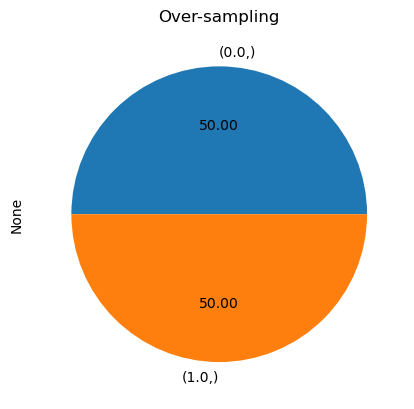

In [126]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy = 1 ,k_neighbors = 2, random_state=1)  
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [127]:
y_res.value_counts()

zero_dose
0.0          20184
1.0          20184
dtype: int64

In [128]:
X_train,y_train=X_res,y_res

In [129]:
len(X_train),len(y_train)

(40368, 40368)

In [130]:
y_test.value_counts()

zero_dose
0.0          8649
1.0           407
dtype: int64

In [131]:
df['zero_dose'].value_counts()

0.0    28833
1.0     1353
Name: zero_dose, dtype: int64

In [132]:
y_train['zero_dose'].value_counts()

0.0    20184
1.0    20184
Name: zero_dose, dtype: int64

In [133]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

In [134]:
X_train,y_train=X_res,y_res

# Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')

In [136]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [137]:
c=lr.intercept_
c

array([4.65734583])

In [138]:
m=lr.coef_
m

array([[ 0.62036358,  1.82872594,  0.62036358,  0.62036358,  0.0924015 ,
        -0.34486767, -0.18433095, -0.18433095,  0.18662714,  0.32356732,
        -0.53721699,  0.31170518, -0.28356557, -1.2089174 , -0.21859338,
         0.05450885,  0.09246847, -0.30199272, -0.22444785,  0.73819513,
        -1.04402358, -0.53114323, -0.99341651, -0.51489327, -0.49253884,
        -0.01053461, -1.07640177, -2.06704536, -1.73312402, -2.25112787,
        -1.64835699,  0.73577282, -3.82510322, -3.32237175, -3.62606443,
        -3.62865727, -2.95638172, -1.43925005, -1.38075436, -1.70897326,
        -2.05783607, -0.62911176, -0.53817532, -2.20306453, -1.6257475 ,
         0.66675453, -1.7194013 ,  0.43161136,  0.53754928, -0.69899688,
         0.31127691,  0.        , -2.17515532, -2.18353757, -0.45065285,
         0.76146887, -0.0958238 , -0.85198792, -0.52785453,  0.2661942 ,
        -0.01947382, -0.29017156, -0.08123886, -0.29843405, -0.2553798 ,
        -0.24969719,  0.02956395, -3.80396727,  6.2

In [139]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [140]:
y_pred_test = lr.predict(X_test)

In [141]:
y_pred_test

array([0., 1., 0., ..., 0., 0., 0.])

In [142]:
pd.value_counts(y_pred_test)

0.0    8002
1.0    1054
dtype: int64

In [143]:
cm=confusion_matrix(y_test,y_pred_test)

In [144]:
len(X_train),len(y_train)

(40368, 40368)

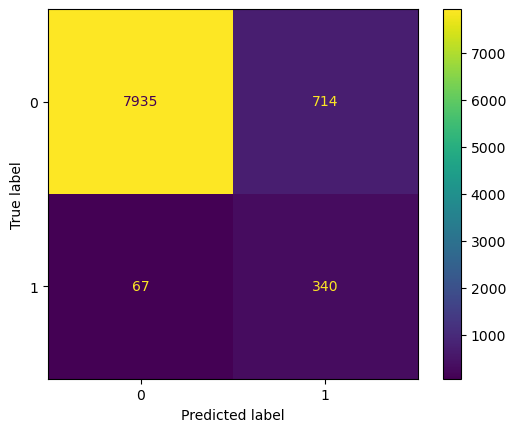

In [145]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [146]:
os_smote=classification_report(y_test,y_pred_test)
print(os_smote)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      8649
         1.0       0.32      0.84      0.47       407

    accuracy                           0.91      9056
   macro avg       0.66      0.88      0.71      9056
weighted avg       0.96      0.91      0.93      9056



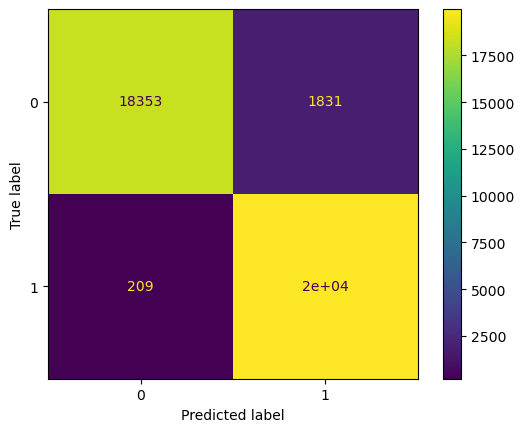

In [147]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [148]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     20184
         1.0       0.92      0.99      0.95     20184

    accuracy                           0.95     40368
   macro avg       0.95      0.95      0.95     40368
weighted avg       0.95      0.95      0.95     40368



In [149]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.62036358  1.82872594  0.62036358  0.62036358  0.0924015  -0.34486767
  -0.18433095 -0.18433095  0.18662714  0.32356732 -0.53721699  0.31170518
  -0.28356557 -1.2089174  -0.21859338  0.05450885  0.09246847 -0.30199272
  -0.22444785  0.73819513 -1.04402358 -0.53114323 -0.99341651 -0.51489327
  -0.49253884 -0.01053461 -1.07640177 -2.06704536 -1.73312402 -2.25112787
  -1.64835699  0.73577282 -3.82510322 -3.32237175 -3.62606443 -3.62865727
  -2.95638172 -1.43925005 -1.38075436 -1.70897326 -2.05783607 -0.62911176
  -0.53817532 -2.20306453 -1.6257475   0.66675453 -1.7194013   0.43161136
   0.53754928 -0.69899688  0.31127691  0.         -2.17515532 -2.18353757
  -0.45065285  0.76146887 -0.0958238  -0.85198792 -0.52785453  0.2661942
  -0.01947382 -0.29017156 -0.08123886 -0.29843405 -0.2553798  -0.24969719
   0.02956395 -3.80396727  6.25305679]]
[4.65734583]


# Uneven Weights

# No Sampling

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [151]:
len(y_train),len(y_test)

(21130, 9056)

In [152]:
y_train.value_counts(dropna=False)

zero_dose
0.0          20184
1.0            946
dtype: int64

In [153]:
len(X_train),len(y_train)

(21130, 21130)

In [154]:
y_train['zero_dose'].value_counts()

0.0    20184
1.0      946
Name: zero_dose, dtype: int64

In [155]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

# Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [157]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
c=lr.intercept_
c

array([-3.1169837])

In [159]:
m=lr.coef_
m

array([[-0.06927939, -0.05784453, -0.06927939, -0.06927939,  0.02817671,
        -0.16142481, -0.01065264, -0.01065264,  0.11624744, -0.03316399,
        -0.42044437,  0.10744744,  0.20925621, -0.2282674 , -0.02320319,
         0.11535567,  0.01295445,  0.07955069,  0.01524453,  0.63499717,
        -0.01949936, -0.10880627, -0.62499926, -0.08529749,  0.04867965,
        -0.0932822 , -0.10100239, -0.27060655, -0.05148692, -0.18445757,
         0.00627282,  0.18527664, -0.19821998,  0.07466141,  0.1716956 ,
        -0.17526095,  0.31301073,  0.84560081,  0.60842662, -0.41022309,
         0.67031596, -0.23838037, -0.19150923,  0.42925596, -0.86737803,
         0.65840246,  0.08185165, -0.12984237, -0.08582863, -0.19105884,
        -0.14430869,  0.        , -0.30125963, -0.40420205, -0.23622443,
         0.29990876, -0.21436865, -0.04959614, -0.06431425, -0.20368383,
        -0.04701188, -0.11575292, -0.04572254, -0.19243378,  0.03878738,
         0.06291227,  0.02019746, -3.8360726 ,  3.7

In [160]:
y_pred_train = lr.predict(X_train)

In [161]:
pd.value_counts(y_pred_train)

0.0    21055
1.0       75
dtype: int64

In [162]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [163]:
y_pred_test = lr.predict(X_test)

In [164]:
pd.value_counts(y_pred_test)

0.0    9019
1.0      37
dtype: int64

In [165]:
cm=confusion_matrix(y_test,y_pred_test)

In [166]:
len(X_train),len(y_train)

(21130, 21130)

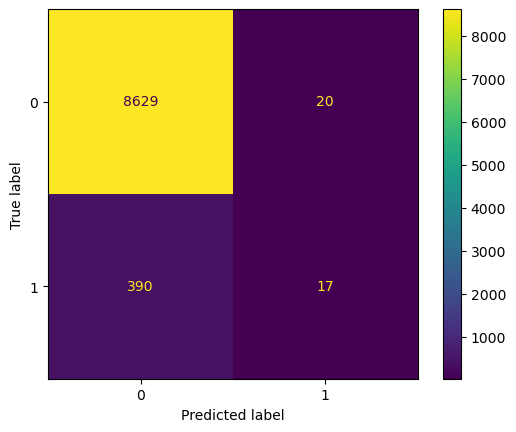

In [167]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [168]:
ns=classification_report(y_test,y_pred_test)
print(ns)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      8649
         1.0       0.46      0.04      0.08       407

    accuracy                           0.95      9056
   macro avg       0.71      0.52      0.53      9056
weighted avg       0.93      0.95      0.94      9056



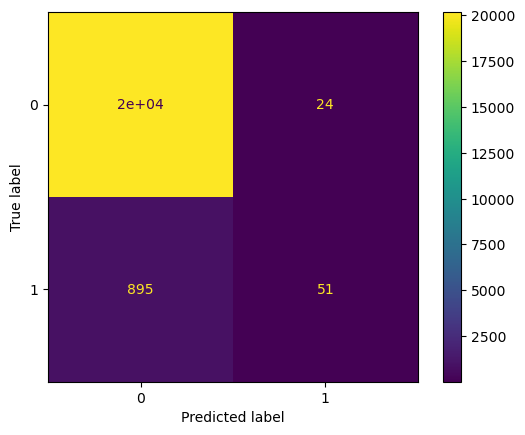

In [169]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [170]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20184
         1.0       0.68      0.05      0.10       946

    accuracy                           0.96     21130
   macro avg       0.82      0.53      0.54     21130
weighted avg       0.95      0.96      0.94     21130



In [171]:
print(lr.coef_)
print(lr.intercept_)

[[-0.06927939 -0.05784453 -0.06927939 -0.06927939  0.02817671 -0.16142481
  -0.01065264 -0.01065264  0.11624744 -0.03316399 -0.42044437  0.10744744
   0.20925621 -0.2282674  -0.02320319  0.11535567  0.01295445  0.07955069
   0.01524453  0.63499717 -0.01949936 -0.10880627 -0.62499926 -0.08529749
   0.04867965 -0.0932822  -0.10100239 -0.27060655 -0.05148692 -0.18445757
   0.00627282  0.18527664 -0.19821998  0.07466141  0.1716956  -0.17526095
   0.31301073  0.84560081  0.60842662 -0.41022309  0.67031596 -0.23838037
  -0.19150923  0.42925596 -0.86737803  0.65840246  0.08185165 -0.12984237
  -0.08582863 -0.19105884 -0.14430869  0.         -0.30125963 -0.40420205
  -0.23622443  0.29990876 -0.21436865 -0.04959614 -0.06431425 -0.20368383
  -0.04701188 -0.11575292 -0.04572254 -0.19243378  0.03878738  0.06291227
   0.02019746 -3.8360726   3.70894868]]
[-3.1169837]


# Undersampling

In [172]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# # rus = RandomUnderSampler(sampling_strategy="not minority") # String
# X_res, y_res = rus.fit_resample(X, y)
# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [173]:
y.value_counts()

zero_dose
0.0          28833
1.0           1353
dtype: int64

In [174]:
# y_res.value_counts()

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [176]:
len(y_train),len(y_test)

(21130, 9056)

In [177]:
y_train.value_counts(dropna=False)

zero_dose
0.0          20184
1.0            946
dtype: int64

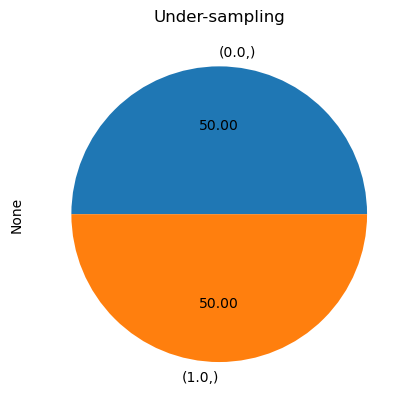

In [178]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1,random_state=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [179]:
X_train,y_train=X_res,y_res

In [180]:
len(X_train),len(y_train)

(1892, 1892)

In [181]:
y_train['zero_dose'].value_counts()

0.0    946
1.0    946
Name: zero_dose, dtype: int64

In [182]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

# Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [184]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [185]:
c=lr.intercept_
c

array([-1.35826617])

In [186]:
m=lr.coef_
m

array([[-1.58750797e-01,  1.57172950e-01, -1.58750797e-01,
        -1.58750797e-01,  3.53043544e-01, -3.19543507e-01,
         4.62972978e-01,  4.62972978e-01,  4.21409907e-01,
         3.37706828e-01,  3.87348430e-02, -1.11470224e-02,
         4.52392688e-01, -1.26515707e-01,  1.35678977e-01,
        -1.89860503e-01, -2.51423678e-02, -1.18087499e-02,
         3.74597981e-02,  1.08240396e+00,  5.36779408e-01,
        -4.29140100e-01, -1.16722119e+00, -3.35587012e-01,
        -4.99828774e-02, -4.09121207e-01, -2.17533939e-01,
         1.12230956e-01,  7.34674494e-01,  1.46338374e-01,
         9.72087215e-01,  1.08107536e-01, -2.00732333e-01,
         1.10037744e-01,  4.70628279e-01, -3.81511537e-01,
        -2.02031103e-01,  1.28863475e-01,  2.85388570e-01,
        -2.09541585e-03,  3.08102890e-01,  0.00000000e+00,
         0.00000000e+00, -2.17439161e-01, -3.71805804e-01,
         5.06348186e-01, -1.36120229e-01,  3.90371968e-01,
        -1.10298286e-01, -1.63471566e-01,  1.32281600e-0

In [187]:
y_pred_train = lr.predict(X_train)

In [188]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [189]:
y_pred_test = lr.predict(X_test)

In [190]:
pd.value_counts(y_pred_test)

0.0    7775
1.0    1281
dtype: int64

In [191]:
cm=confusion_matrix(y_test,y_pred_test)

In [192]:
len(X_train),len(y_train)

(1892, 1892)

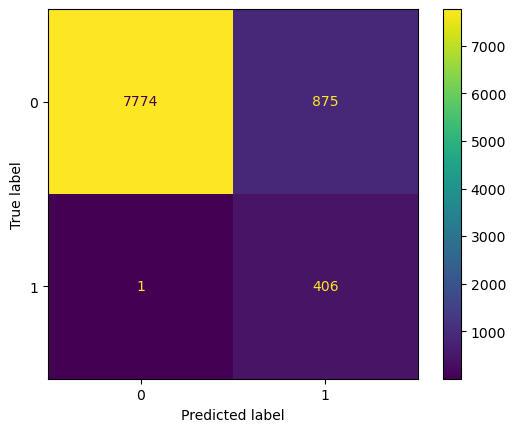

In [193]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [194]:
us=classification_report(y_test,y_pred_test)
print(us)

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      8649
         1.0       0.32      1.00      0.48       407

    accuracy                           0.90      9056
   macro avg       0.66      0.95      0.71      9056
weighted avg       0.97      0.90      0.93      9056



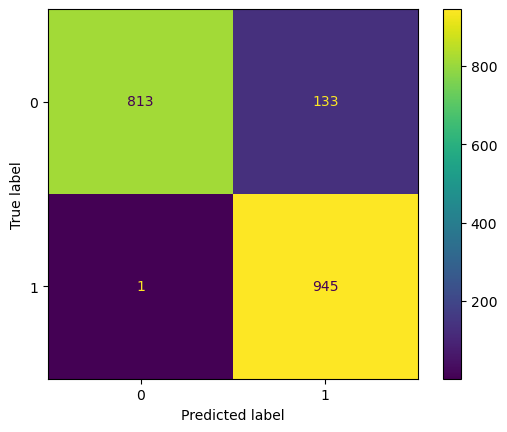

In [195]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [196]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92       946
         1.0       0.88      1.00      0.93       946

    accuracy                           0.93      1892
   macro avg       0.94      0.93      0.93      1892
weighted avg       0.94      0.93      0.93      1892



In [197]:
print(lr.coef_)
print(lr.intercept_)

[[-1.58750797e-01  1.57172950e-01 -1.58750797e-01 -1.58750797e-01
   3.53043544e-01 -3.19543507e-01  4.62972978e-01  4.62972978e-01
   4.21409907e-01  3.37706828e-01  3.87348430e-02 -1.11470224e-02
   4.52392688e-01 -1.26515707e-01  1.35678977e-01 -1.89860503e-01
  -2.51423678e-02 -1.18087499e-02  3.74597981e-02  1.08240396e+00
   5.36779408e-01 -4.29140100e-01 -1.16722119e+00 -3.35587012e-01
  -4.99828774e-02 -4.09121207e-01 -2.17533939e-01  1.12230956e-01
   7.34674494e-01  1.46338374e-01  9.72087215e-01  1.08107536e-01
  -2.00732333e-01  1.10037744e-01  4.70628279e-01 -3.81511537e-01
  -2.02031103e-01  1.28863475e-01  2.85388570e-01 -2.09541585e-03
   3.08102890e-01  0.00000000e+00  0.00000000e+00 -2.17439161e-01
  -3.71805804e-01  5.06348186e-01 -1.36120229e-01  3.90371968e-01
  -1.10298286e-01 -1.63471566e-01  1.32281600e-01  0.00000000e+00
  -1.18476636e-01 -6.31709823e-02 -3.64158710e-01  2.68847817e-01
  -1.03173723e-01 -1.18802879e-01 -3.88491106e-01  1.75935518e-01
  -8.59199

# Oversampling

In [198]:
# from imblearn.over_sampling import RandomOverSampler
# rus = RandomOverSampler(sampling_strategy=1) # Numerical value
# # rus = RandomUnderSampler(sampling_strategy="not minority") # String
# X_res, y_res = rus.fit_resample(X, y)
# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [199]:
y.value_counts()

zero_dose
0.0          28833
1.0           1353
dtype: int64

In [200]:
y_res.value_counts()

zero_dose
0.0          946
1.0          946
dtype: int64

In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [202]:
len(y_train),len(y_test)

(21130, 9056)

In [203]:
y_train.value_counts()

zero_dose
0.0          20184
1.0            946
dtype: int64

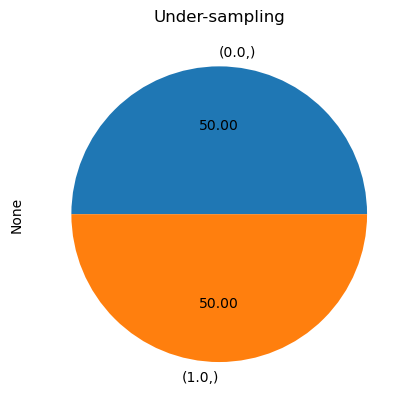

In [204]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy=1,random_state=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [205]:
X_train,y_train=X_res,y_res

In [206]:
y_train['zero_dose'].value_counts()

0.0    20184
1.0    20184
Name: zero_dose, dtype: int64

In [207]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

# Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [209]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
c=lr.intercept_
c

array([-0.88824309])

In [211]:
m=lr.coef_
m

array([[-1.63569992e-01, -3.72823069e-01, -1.63569992e-01,
        -1.63569992e-01,  6.67103868e-02, -1.67878839e-01,
         2.09993405e-02,  2.09993405e-02,  9.50461389e-02,
         1.11936736e-02, -5.85598708e-01,  1.85067031e-01,
         2.32796395e-01, -3.06161991e-01,  6.82027503e-02,
         1.26269811e-01, -8.20346848e-02,  7.04168527e-02,
        -6.94188203e-02,  7.69522728e-01, -1.24817266e-02,
        -4.95190509e-02, -7.71159270e-01, -1.37417408e-01,
         7.15716757e-02, -8.55081899e-02, -5.94557542e-02,
        -2.22296603e-01, -1.38772509e-03, -2.19813571e-01,
         7.14192146e-02,  1.60061940e-01, -2.98329166e-01,
        -3.27245540e-02,  8.15901474e-02, -2.86929489e-01,
         7.50645562e-01,  1.13418726e+00,  9.19537670e-01,
        -1.06700304e+00,  1.02211306e+00, -4.48270018e-01,
        -3.88781263e-01,  8.49358760e-01, -1.14673739e+00,
         6.98034839e-01, -8.76905060e-02, -5.33341709e-02,
        -1.80027874e-01, -1.88982360e-01, -3.76920405e-0

In [212]:
y_pred_train = lr.predict(X_train)

In [213]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [214]:
y_pred_test = lr.predict(X_test)

In [215]:
pd.value_counts(y_pred_test)

0.0    7768
1.0    1288
dtype: int64

In [216]:
cm=confusion_matrix(y_test,y_pred_test)

In [217]:
len(X_train),len(y_train)

(40368, 40368)

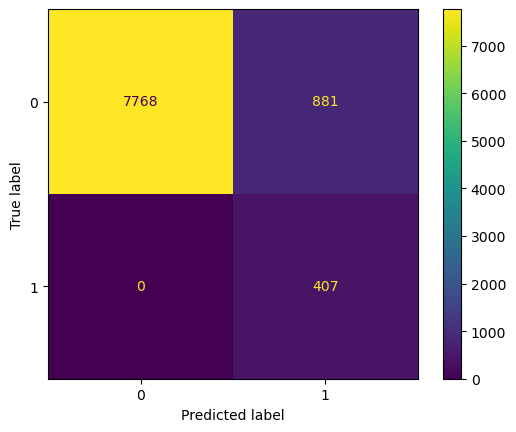

In [218]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [219]:
os=classification_report(y_test,y_pred_test)
print(os)

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      8649
         1.0       0.32      1.00      0.48       407

    accuracy                           0.90      9056
   macro avg       0.66      0.95      0.71      9056
weighted avg       0.97      0.90      0.93      9056



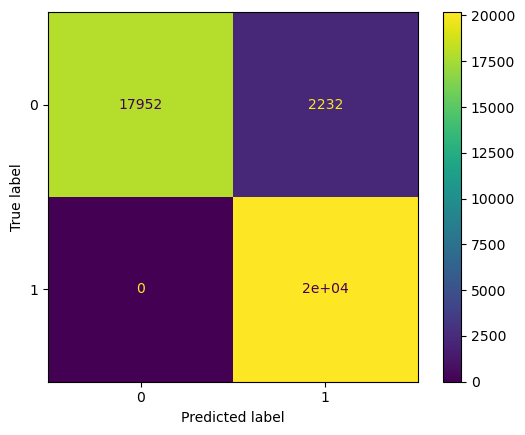

In [220]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [221]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     20184
         1.0       0.90      1.00      0.95     20184

    accuracy                           0.94     40368
   macro avg       0.95      0.94      0.94     40368
weighted avg       0.95      0.94      0.94     40368



In [222]:
print(lr.coef_)
print(lr.intercept_)

[[-1.63569992e-01 -3.72823069e-01 -1.63569992e-01 -1.63569992e-01
   6.67103868e-02 -1.67878839e-01  2.09993405e-02  2.09993405e-02
   9.50461389e-02  1.11936736e-02 -5.85598708e-01  1.85067031e-01
   2.32796395e-01 -3.06161991e-01  6.82027503e-02  1.26269811e-01
  -8.20346848e-02  7.04168527e-02 -6.94188203e-02  7.69522728e-01
  -1.24817266e-02 -4.95190509e-02 -7.71159270e-01 -1.37417408e-01
   7.15716757e-02 -8.55081899e-02 -5.94557542e-02 -2.22296603e-01
  -1.38772509e-03 -2.19813571e-01  7.14192146e-02  1.60061940e-01
  -2.98329166e-01 -3.27245540e-02  8.15901474e-02 -2.86929489e-01
   7.50645562e-01  1.13418726e+00  9.19537670e-01 -1.06700304e+00
   1.02211306e+00 -4.48270018e-01 -3.88781263e-01  8.49358760e-01
  -1.14673739e+00  6.98034839e-01 -8.76905060e-02 -5.33341709e-02
  -1.80027874e-01 -1.88982360e-01 -3.76920405e-02  0.00000000e+00
  -3.63989908e-01 -4.75719433e-01 -1.97361645e-01  2.67414137e-01
  -2.01510042e-01 -2.41369080e-02 -5.76232824e-02 -1.79569217e-01
  -4.97257

# Oversampling SMOTE

In [223]:
# from imblearn.over_sampling import SMOTE
# rus = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=1)  
# # rus = RandomUnderSampler(sampling_strategy="not minority") # String
# X_res, y_res = rus.fit_resample(X, y)
# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [224]:
y.value_counts()

zero_dose
0.0          28833
1.0           1353
dtype: int64

In [225]:
X

,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,...,icds_rec_bf,any_anaemia,stunting,stunting_severe,wasting,wasting_severe,underweight,underweight_severe,fully_vac,under_vacc
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
30182,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
30183,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30184,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [226]:
y

,zero_dose
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30181,0.0
30182,0.0
30183,0.0
30184,0.0


In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [228]:
len(X_train),len(X_test),len(y_train),len(y_test)

(21130, 9056, 21130, 9056)

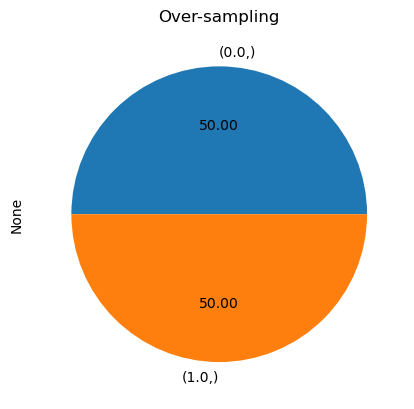

In [229]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy = 1 ,k_neighbors = 2, random_state=1)  
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [230]:
y_res.value_counts()

zero_dose
0.0          20184
1.0          20184
dtype: int64

In [231]:
X_train,y_train=X_res,y_res

In [232]:
len(X_train),len(y_train)

(40368, 40368)

In [233]:
y_test.value_counts()

zero_dose
0.0          8649
1.0           407
dtype: int64

In [234]:
df['zero_dose'].value_counts()

0.0    28833
1.0     1353
Name: zero_dose, dtype: int64

In [235]:
y_train['zero_dose'].value_counts()

0.0    20184
1.0    20184
Name: zero_dose, dtype: int64

In [236]:
y_test['zero_dose'].value_counts()

0.0    8649
1.0     407
Name: zero_dose, dtype: int64

In [237]:
X_train,y_train=X_res,y_res

# Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [239]:
lr.fit(X_train,y_train)

/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ee/staff/naveen.cstaff/scratch/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [240]:
c=lr.intercept_
c

array([4.65734583])

In [241]:
m=lr.coef_
m

array([[ 0.62036358,  1.82872594,  0.62036358,  0.62036358,  0.0924015 ,
        -0.34486767, -0.18433095, -0.18433095,  0.18662714,  0.32356732,
        -0.53721699,  0.31170518, -0.28356557, -1.2089174 , -0.21859338,
         0.05450885,  0.09246847, -0.30199272, -0.22444785,  0.73819513,
        -1.04402358, -0.53114323, -0.99341651, -0.51489327, -0.49253884,
        -0.01053461, -1.07640177, -2.06704536, -1.73312402, -2.25112787,
        -1.64835699,  0.73577282, -3.82510322, -3.32237175, -3.62606443,
        -3.62865727, -2.95638172, -1.43925005, -1.38075436, -1.70897326,
        -2.05783607, -0.62911176, -0.53817532, -2.20306453, -1.6257475 ,
         0.66675453, -1.7194013 ,  0.43161136,  0.53754928, -0.69899688,
         0.31127691,  0.        , -2.17515532, -2.18353757, -0.45065285,
         0.76146887, -0.0958238 , -0.85198792, -0.52785453,  0.2661942 ,
        -0.01947382, -0.29017156, -0.08123886, -0.29843405, -0.2553798 ,
        -0.24969719,  0.02956395, -3.80396727,  6.2

In [242]:
# import matplotlib.pyplot as plt
# plt.scatter(y_train,y_pred_train)
# plt.xlabel('Actual charges')
# plt.ylabel('Predicted charges')
# plt.show()

In [243]:
y_pred_test = lr.predict(X_test)

In [244]:
y_pred_test

array([0., 1., 0., ..., 0., 0., 0.])

In [245]:
pd.value_counts(y_pred_test)

0.0    8002
1.0    1054
dtype: int64

In [246]:
cm=confusion_matrix(y_test,y_pred_test)

In [247]:
len(X_train),len(y_train)

(40368, 40368)

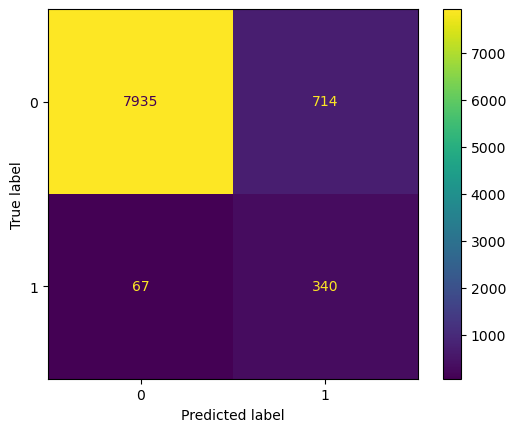

In [248]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [249]:
os_smote=classification_report(y_test,y_pred_test)
print(os_smote)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      8649
         1.0       0.32      0.84      0.47       407

    accuracy                           0.91      9056
   macro avg       0.66      0.88      0.71      9056
weighted avg       0.96      0.91      0.93      9056



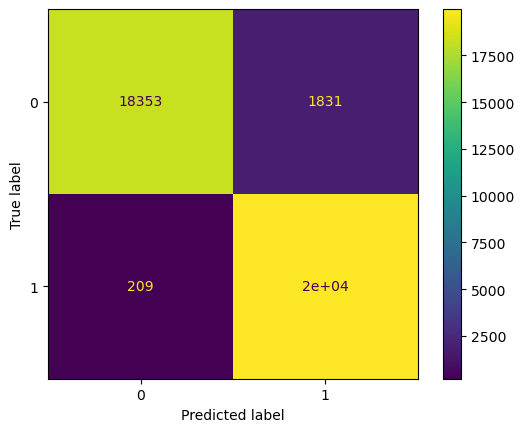

In [250]:
y_pred_train = lr.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [251]:
us=classification_report(y_train,y_pred_train)
print(us)

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     20184
         1.0       0.92      0.99      0.95     20184

    accuracy                           0.95     40368
   macro avg       0.95      0.95      0.95     40368
weighted avg       0.95      0.95      0.95     40368



In [252]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.62036358  1.82872594  0.62036358  0.62036358  0.0924015  -0.34486767
  -0.18433095 -0.18433095  0.18662714  0.32356732 -0.53721699  0.31170518
  -0.28356557 -1.2089174  -0.21859338  0.05450885  0.09246847 -0.30199272
  -0.22444785  0.73819513 -1.04402358 -0.53114323 -0.99341651 -0.51489327
  -0.49253884 -0.01053461 -1.07640177 -2.06704536 -1.73312402 -2.25112787
  -1.64835699  0.73577282 -3.82510322 -3.32237175 -3.62606443 -3.62865727
  -2.95638172 -1.43925005 -1.38075436 -1.70897326 -2.05783607 -0.62911176
  -0.53817532 -2.20306453 -1.6257475   0.66675453 -1.7194013   0.43161136
   0.53754928 -0.69899688  0.31127691  0.         -2.17515532 -2.18353757
  -0.45065285  0.76146887 -0.0958238  -0.85198792 -0.52785453  0.2661942
  -0.01947382 -0.29017156 -0.08123886 -0.29843405 -0.2553798  -0.24969719
   0.02956395 -3.80396727  6.25305679]]
[4.65734583]


In [253]:
coef=lr.coef_.ravel()
inter=lr.intercept_

coef

array([ 0.62036358,  1.82872594,  0.62036358,  0.62036358,  0.0924015 ,
       -0.34486767, -0.18433095, -0.18433095,  0.18662714,  0.32356732,
       -0.53721699,  0.31170518, -0.28356557, -1.2089174 , -0.21859338,
        0.05450885,  0.09246847, -0.30199272, -0.22444785,  0.73819513,
       -1.04402358, -0.53114323, -0.99341651, -0.51489327, -0.49253884,
       -0.01053461, -1.07640177, -2.06704536, -1.73312402, -2.25112787,
       -1.64835699,  0.73577282, -3.82510322, -3.32237175, -3.62606443,
       -3.62865727, -2.95638172, -1.43925005, -1.38075436, -1.70897326,
       -2.05783607, -0.62911176, -0.53817532, -2.20306453, -1.6257475 ,
        0.66675453, -1.7194013 ,  0.43161136,  0.53754928, -0.69899688,
        0.31127691,  0.        , -2.17515532, -2.18353757, -0.45065285,
        0.76146887, -0.0958238 , -0.85198792, -0.52785453,  0.2661942 ,
       -0.01947382, -0.29017156, -0.08123886, -0.29843405, -0.2553798 ,
       -0.24969719,  0.02956395, -3.80396727,  6.25305679])

In [254]:
wts=X.columns.to_frame(index=False,name='Class')
wts

,Class
0,impr_ws
1,unimpr_ws
2,basic_drinking_w
3,limited_drinking_w
4,jmp_w8
...,...
64,wasting_severe
65,underweight
66,underweight_severe
67,fully_vac


In [255]:
wts['weights']=pd.Series(coef)
wts

,Class,weights
0,impr_ws,0.620364
1,unimpr_ws,1.828726
2,basic_drinking_w,0.620364
3,limited_drinking_w,0.620364
4,jmp_w8,0.092402
...,...,...
64,wasting_severe,-0.255380
65,underweight,-0.249697
66,underweight_severe,0.029564
67,fully_vac,-3.803967


In [256]:
wts.to_csv('weights.csv', index=False)